In [21]:

import pandas as pd
import numpy as np
import collections

taylor_swift = pd.read_csv("01-taylor_swift.csv")
fearless = pd.read_csv("02-fearless_taylors_version.csv")
speak_now = pd.read_csv("03-speak_now_deluxe_package.csv")
red = pd.read_csv("04-red_deluxe_edition.csv")
album_1989 = pd.read_csv("05-1989_deluxe.csv")
reputation = pd.read_csv("06-reputation.csv")
lover = pd.read_csv("07-lover.csv")
folklore = pd.read_csv("08-folklore_deluxe_version.csv")
evermore = pd.read_csv("09-evermore_deluxe_version.csv")

album_info = [taylor_swift, fearless, speak_now, red, album_1989, reputation, lover, folklore, evermore]
albums_df = pd.concat(album_info)

albums_df.columns

Index(['album_name', 'track_title', 'track_n', 'lyric', 'line'], dtype='object')

In [22]:

albums_df['lyric'] = albums_df['lyric'].apply(lambda x: x.lower())\
    .replace(',', '', regex = True)\
    .replace('"', '', regex = True)\
    .replace('\.', '', regex = True)\
    .replace('\?', '', regex = True)\
    .replace('\(', '', regex = True)\
    .replace('\)', '', regex = True) 

lyrics_columns = ['album_name', 'track_title', 'track_n'] 

lyrics = albums_df.sort_values(lyrics_columns)\
    .groupby(lyrics_columns).lyric\
    .apply(' '.join)\
    .reset_index(name='lyric')
    
lyrics = lyrics.sort_values(by = ['album_name','track_n']) 
    


,track_n
count,163.000000
mean,9.877301
std,5.844458
min,1.000000
25%,5.000000
50%,10.000000
75%,14.000000
max,26.000000


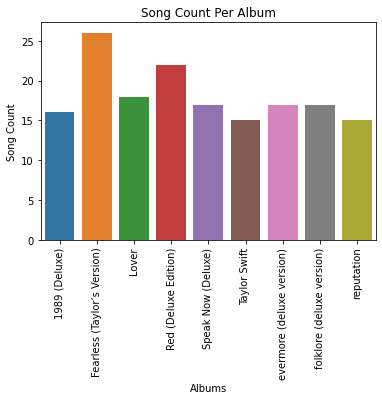

In [49]:
import seaborn as sns

song_count=sns.countplot(data=lyrics, x='album_name').set_title('Song Count Per Album')
plt.xlabel('Albums')
plt.ylabel('Song Count') 
plt.xticks(rotation=90)
plt.clf



Before I get started with the predictor, I wanted to take a look at the frequency of words in Taylor Swifts Albums. There may be a high concentration of the same stopwords across different albums. To get an idea of the frequency of the words, I will start off with looking at my favorite taylor swift song, 'Tim McGraw'.

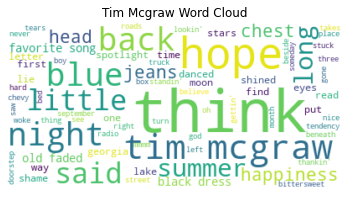

<Figure size 432x288 with 0 Axes>

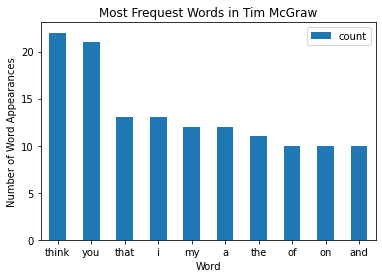

<Figure size 432x288 with 0 Axes>

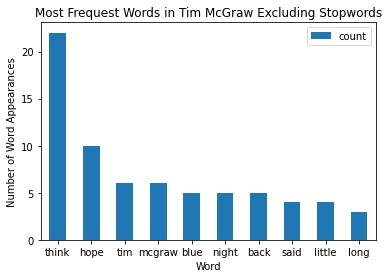

<Figure size 432x288 with 0 Axes>

In [43]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

tim_mcgraw = lyrics.loc[lyrics['track_title']=='Tim McGraw', 'lyric'].item()  

#Word Cloud
tm_wc = WordCloud(background_color='white', max_font_size=70) 
tm_wc.generate(tim_mcgraw)

plt.imshow(tm_wc, interpolation = 'bilinear')  
plt.title('Tim McGraw Word Cloud')  
plt.axis('off')
plt.show()
plt.clf()

#top words
split_words = tim_mcgraw.split()
counter = Counter(split_words)
top_words = counter.most_common(10)

#top filtered words
filtered_words = [word for word in split_words if word not in stopwords.words('english')]
filtered_counter = Counter(filtered_words)
filtered_top_words = filtered_counter.most_common(10)

#Bar Chart of all top words
album_df = pd.DataFrame(top_words, columns = ['word','count'])
album_df.plot.bar(x='word',y='count')
plt.title('Most Frequest Words in Tim McGraw')   
plt.ylabel('Number of Word Appearances')  
plt.xlabel('Word') 
plt.xticks(rotation=0)
plt.show(block=True)
plt.clf()

#Bar chart of all top words with stop words filtered out
album_df = pd.DataFrame(filtered_top_words, columns = ['word','count'])
album_df.plot.bar(x='word',y='count')
plt.title('Most Frequest Words in Tim McGraw Excluding Stopwords')
plt.ylabel('Number of Word Appearances')  
plt.xlabel('Word') 
plt.xticks(rotation=0)
plt.show(block=True)
plt.clf()




In [24]:
album_names =lyrics['album_name'].unique()
print(album_names)

['1989 (Deluxe)' 'Fearless (Taylor’s Version)' 'Lover'
 'Red (Deluxe Edition)' 'Speak Now (Deluxe)' 'Taylor Swift'
 'evermore (deluxe version)' 'folklore (deluxe version)' 'reputation']


for albums:


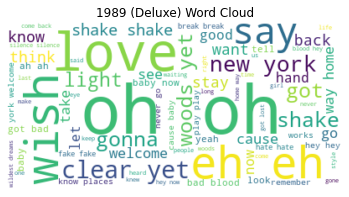

<Figure size 432x288 with 0 Axes>

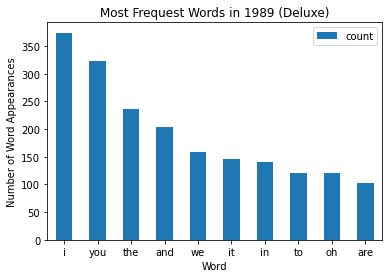

<Figure size 432x288 with 0 Axes>

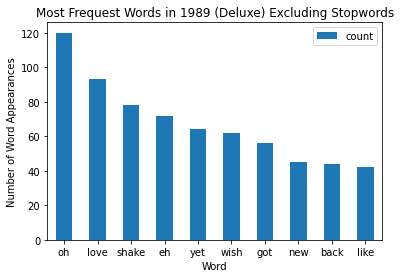

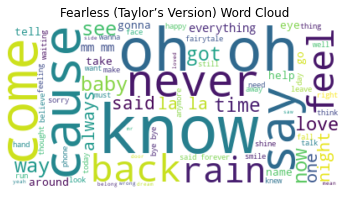

<Figure size 432x288 with 0 Axes>

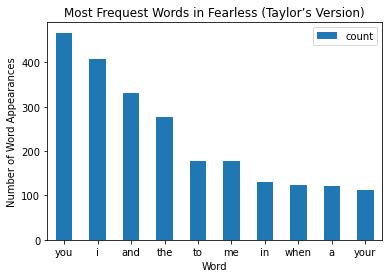

<Figure size 432x288 with 0 Axes>

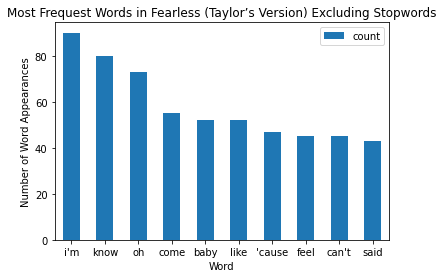

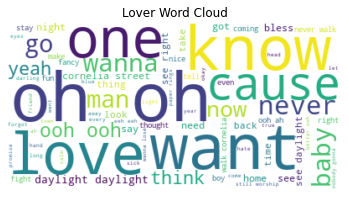

<Figure size 432x288 with 0 Axes>

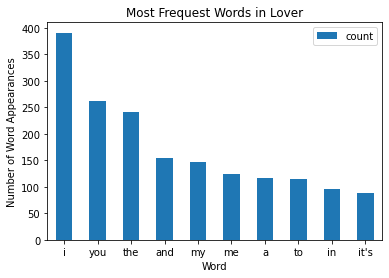

<Figure size 432x288 with 0 Axes>

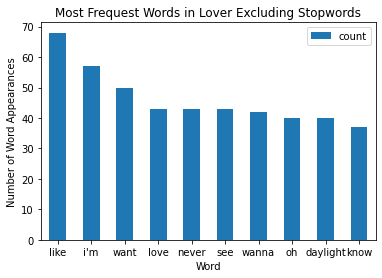

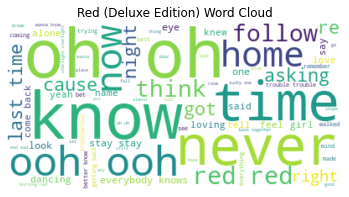

<Figure size 432x288 with 0 Axes>

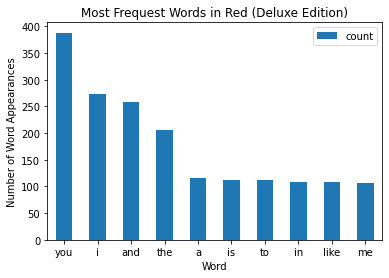

<Figure size 432x288 with 0 Axes>

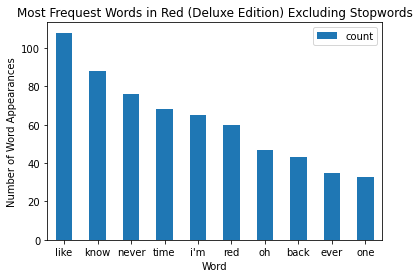

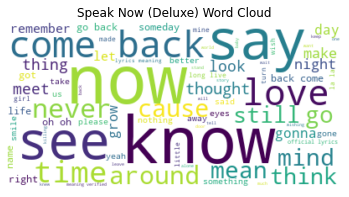

<Figure size 432x288 with 0 Axes>

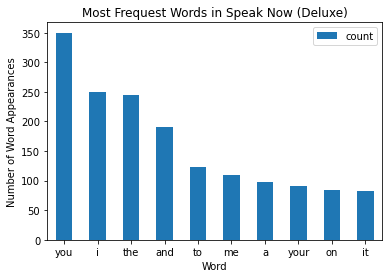

<Figure size 432x288 with 0 Axes>

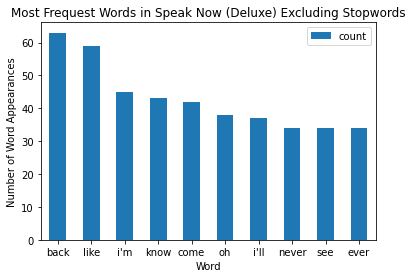

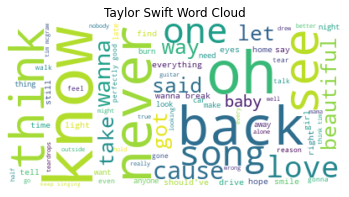

<Figure size 432x288 with 0 Axes>

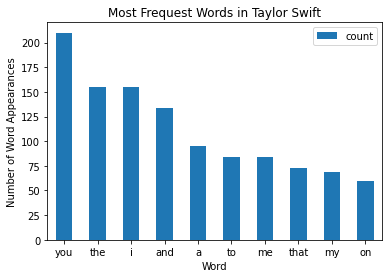

<Figure size 432x288 with 0 Axes>

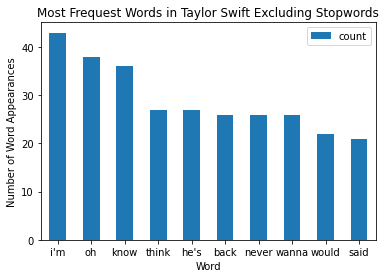

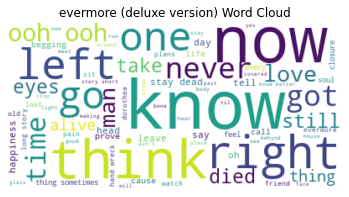

<Figure size 432x288 with 0 Axes>

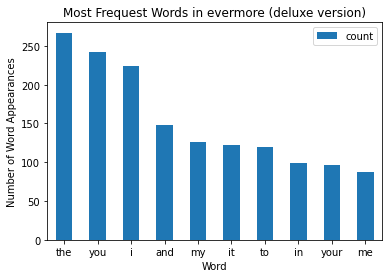

<Figure size 432x288 with 0 Axes>

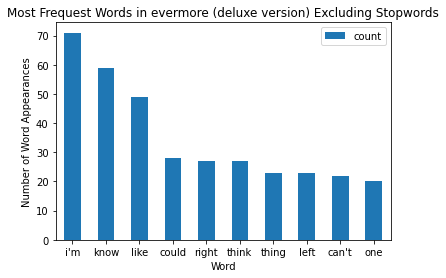

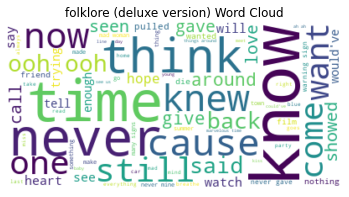

<Figure size 432x288 with 0 Axes>

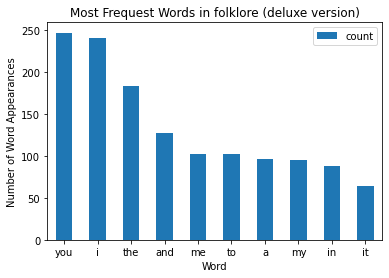

<Figure size 432x288 with 0 Axes>

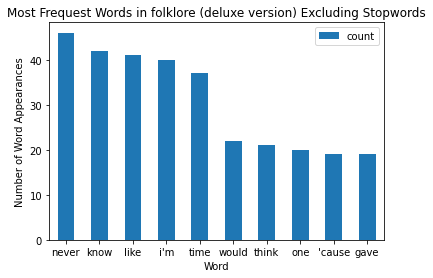

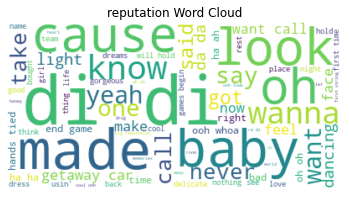

<Figure size 432x288 with 0 Axes>

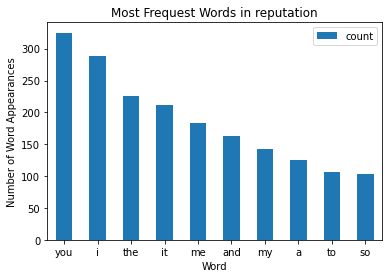

<Figure size 432x288 with 0 Axes>

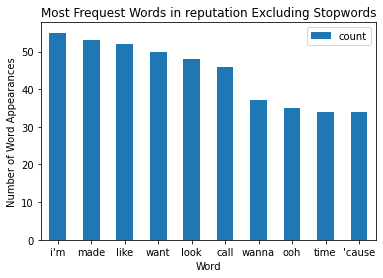

<Figure size 432x288 with 0 Axes>

In [45]:



for album_name in album_names:
    tracks=lyrics.loc[lyrics['album_name']==album_name,'track_n']
    album_words = '' 
    
    for j in tracks:
        track_words = lyrics.loc[((lyrics['track_n']==j) & (lyrics['album_name']==album_name)) , 'lyric'].item()  
        album_words += track_words
    
    
    wc = WordCloud(background_color='white', max_font_size=80,max_words=75) 
    wc.generate(album_words)
    
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'{album_name} Word Cloud')  
    plt.axis('off')
    plt.show()
    plt.clf()
    
    
    #top words
    split_words = album_words.split()
    counter = Counter(split_words)
    top_words = counter.most_common(10)

    #top filtered words
    filtered_words = [word for word in split_words if word not in stopwords.words('english')]
    filtered_counter = Counter(filtered_words)
    filtered_top_words = filtered_counter.most_common(10)

    #Bar Chart of all top words
    album_df = pd.DataFrame(top_words, columns = ['word','count'])
    album_df.plot.bar(x='word',y='count')
    plt.title(f'Most Frequest Words in {album_name}')   
    plt.ylabel('Number of Word Appearances')  
    plt.xlabel('Word') 
    plt.xticks(rotation=0)
    plt.show(block=True)
    plt.clf()

    #Bar chart of all top words with stop words filtered out
    album_df = pd.DataFrame(filtered_top_words, columns = ['word','count'])
    album_df.plot.bar(x='word',y='count')
    plt.title(f'Most Frequest Words in {album_name} Excluding Stopwords')
    plt.ylabel('Number of Word Appearances')  
    plt.xlabel('Word') 
    plt.xticks(rotation=0)
    plt.show(block=True)
    plt.clf()

After looking at all the albums, I think removing the stop words will be the best call. This will make the predictor more based theme and tone, rather than abut the concentration of certain words that do not add meaning to the songs.

 Instead of removing them now, we can see what our model is like with them then remove. Now, we can split the data into the trainging and test sets.

In [185]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# random seed to make results repeatable
random_seed = 200 

# number of songs to pull FROM each album
n = 14 # 75%-ish

train_df = pd.DataFrame()
test_df = pd.DataFrame()
for album in album_names: # loop over each genre
    subset =lyrics[lyrics.album_name==album]
    
    training_set = subset.sample(n=n, random_state=random_seed)
    test_set = subset.drop(training_set.index)
    training_df = training_df.append(training_set) # append subsets to the master sets
    test_df = test_df.append(test_set)
    
training_df = shuffle(training_df)
test_df = shuffle(test_df)

Next step is to train the model. I will be using CountVectorizer to train the model using word counts.

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# define our model
text_classifier = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
text_classifier.fit(training_df.lyric, training_df.album_name)  

# score our model on testing data
predicted = text_classifier.predict(test_df.lyric)
np.mean(predicted == test_df.album_name)

0.32432432432432434

Such a low number is expected, since I am not working with a very large dataset. Next, I will try to get a better model using TfidVectorizer. 

In [197]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

# define our model
text_classifier = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
text_classifier.fit(training_df.lyric, training_df.album_name)  

# score our model on testing data
predicted = text_classifier.predict(test_df.lyric)
np.mean(predicted == test_df.album_name) 

0.2702702702702703

Well, it's worse. Now, I will keep this model and try removing stopwords to see if that makes a difference. I will also include bigrams into this next model version.

A bigram is a sequence of two adjacent elements for a string of tokens, which are typically letters syllables or words. In this case, it will be words. It will take into account how Taylor Swift writes and how that might change from album to album.

In [198]:
stop_list = list(set(stopwords.words('english'))) 

text_classifier = Pipeline(
    [('vect', TfidfVectorizer(
        ngram_range=(1,2),
        stop_words=stop_list)),
     ('clf', MultinomialNB(alpha=0.1))])

text_classifier.fit(training_df.lyric, training_df.album_name)  

# score our model on testing data
predicted = text_classifier.predict(test_df.lyric)
np.mean(predicted == test_df.album_name)

0.2972972972972973

In [199]:
text_classifier = Pipeline(
    [('vect', TfidfVectorizer(
        ngram_range=(1,2))),
     ('clf', MultinomialNB(alpha=0.1))])

text_classifier.fit(training_df.lyric, training_df.album_name)  

# score our model on testing data
predicted = text_classifier.predict(test_df.lyric)
np.mean(predicted == test_df.album_name)

0.2702702702702703

Turns out, removing stopwords does actually help the model! I will play around with some other parameters, to see if we can get the mean any higher.

In [210]:
text_classifier = Pipeline(
    [('vect', TfidfVectorizer(
        ngram_range=(1,2),
        max_df=0.4,
        min_df=4)),
     ('clf', MultinomialNB(alpha=0.1))])

text_classifier.fit(training_df.lyric, training_df.album_name)  

# score our model on testing data
predicted = text_classifier.predict(test_df.lyric)
np.mean(predicted == test_df.album_name)

0.2972972972972973

After testing combinations of every potentially relevant parameter in Scikit-Learn's TfidVectorizer, ngram_range (adds bigrams), max_df (ignores words that are in more than n% of songs), and min_df (ignores words in less than m songs) are the two parameters that give us the highest mean.

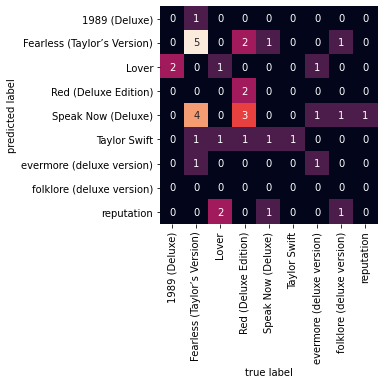

In [200]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_df.album_name, predicted)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=album_names, 
    yticklabels=album_names
)
plt.xlabel('True')
plt.ylabel('Predicted');

Now its time to predict! Let's see how it holds up against songs that are From the Vault. These songs were meant to be originally released with some of the albums but were never orgininally, and they are not included in the model.


In [217]:
text_classifier.predict(['''i know i'm probably better off on my own
than lovin a man who didnt know what he had when he had it
and i see the permanent damage you did to me
never again i just wish i could forget when it was magic''',
'''they tell you while you're young
girls go out and have your fun
then they hunt and slay the ones who actually do it
criticize the way you fly
when you're soaring through the sky
shoot you down and then they sigh
and say she looks like she's been through it
lord what will become of me
once i've lost my novelty'''])


array(['Speak Now (Deluxe)', 'folklore (deluxe version)'], dtype='<U27')

Interesting! Both are "wrong". These songs are FROM the recent release of the Red (Deluxe Edition) album. Well, now its time to try new lyrics FROM a song that has been extended,"All Too Well". This is a prediction that has a high chance of neing right if the original is incluses in the training set, since the new lyrics repeat parts of lines in the original song.

Let's find out!

In [220]:
text_classifier.predict(['''and you were tossing me the car keys
f the patriarchy keychain on the ground
we were always skipping town
and i was thinking on the drive down
any time now hes gonna say its love
you never called it what it was
til we were dead and gone and buried
check the pulse and come back
swearing its the same after 3 months in the grave
and then you wondered where it went to
as i reached for you but
all i felt was shame
and you held my lifeless frame
and there we are again
when nobody had to know
you kept me like a secret
but i kept you like an oath
sacred prayer and wed swear
to remember it all too well
they say alls well that ends well
but im in a new hell every time
you doublecross my mind
you said if we had been closer in age
maybe it would have been fine
and that made me want to die

the idea you had of me
who was she
a neverneedy ever lovely jewel
whose shine reflects on you
not weeping in a party bathroom
some actress asking me what happened
you
thats what happened you
you who charmed my dad with selfeffacing jokes
sipping coffee like you were on a late night show
but then he watched me watch the front door
all night willing you to come
and he said its supposed to be fun
turning 21
and i was never good at telling jokes
but the punchline goes
ill get older but your lovers stay my age
from when your brooklyn broke my skin and bones
im a soldier whos returning half her weight
and did the twin flame bruise paint you blue
just between us did the love affair maim you too
cause in this citys barren cold
i still remember the first fall of snow
and how it glistened as it fell
i remember it all too well

just between us did the love affair maim you
all too well
just between us do you remember it
all too well
just between us i remember it all too well
wind in my hair
i was there i was there
down the stairs i was there
i was there
sacred prayer
i was there i was there
it was rare you remember it
all too well'''])

array(['evermore (deluxe version)'], dtype='<U27')

I guess we know it was not included? 

Besides that, it is interesting to note that the album predicted for this portion of the song is Taylor Swift's newest album with all original songs (this excludes the albums she has been releasing). Since this additional portion of "All Too Well" was likely written after evermore was relased, it makes sense that her latest writing would match most the writing right before it.